**1)  Importing the packages and libraries**

let's start off by importing the necessary libraries for data analysis and visualisation

In [121]:
#lets load the required packages and libraries for data analysis
import numpy as np 
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


**2) Reading and exploring the data**

 let's read the training and testing datasets from the provided CSV files and use the ***.head()*** and ***.info()*** methods to take a glimpse at our data

In [122]:
#importing the training and test datasets
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')                                                               
                       

In [123]:
#lets take a look at our training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
# Now the test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The Survived column is missing here because that is what we are supposed to predict with our model.

In [125]:
# lets see what kind of data we have to work with
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above, we can see that we  have 891 rows or samples and  12 columns of types  *int64* , *object* and *float64 *to work with

**3) Data analysis :**

Now let's see what features we have to train our model on and what useful insights we can obtain from them.  


In [126]:
#printing out a list of all the columns in our training dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

** Types of features : **

* Categorical : Pclass, Sex, Embarked, Survived
* Continuous : Age, Fare, Sibsp, Parch, PassengerId
* Alphanumeric: Ticket, Cabin, Name

Now that we know what kind of features we are going to work with, let's take a look what information they provide us:

In [127]:
#printing summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** Observations from above summary statistics: **
* There are a total of 891 passengers in our training dataset.
* Since the Survived column has dicrete data, the mean gives us the number of people survived from 891 i.e. 38%.
* Most people belonged to Pclass = 3
* The maximum Fare paid for a ticket was 512 however the fare prices varied a lot as we can see from the standard deviation of 49

In [128]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Taking a look at our categorical features we find that: 
* The passneger column has two sexes with male being the most common.
* Cabin feature has many duplicate values.
* Embarked has three possible values with most passengers embarking from Southhampton.
* Names of all passengers are unique.
* Ticket column also has a fair amount of duplicate values.


In [129]:
#Finding the percantage of missing values in train dataset
train_df.isnull().sum()/ len(train_df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [130]:
#Finding the percentage of Null values in test dataset
test_df.isnull().sum()/ len(test_df) *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

4) Visual Data Analysis

It's time to visualize our data and try to draw some inferences from it


let's begin by exploring the Sex column in our trainig data set

Sex
male      577
female    314
Name: count, dtype: int64

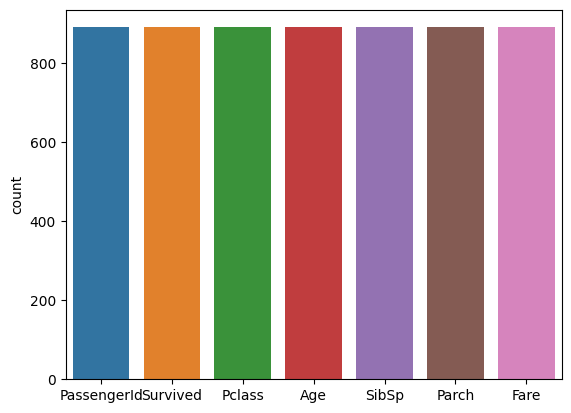

In [131]:
sns.countplot(data = train_df)
train_df['Sex'].value_counts()

The number of males on board were clearly more than the female. Now let's see how their survival percentages were:

,Sex,Survived
0,female,0.742038
1,male,0.188908


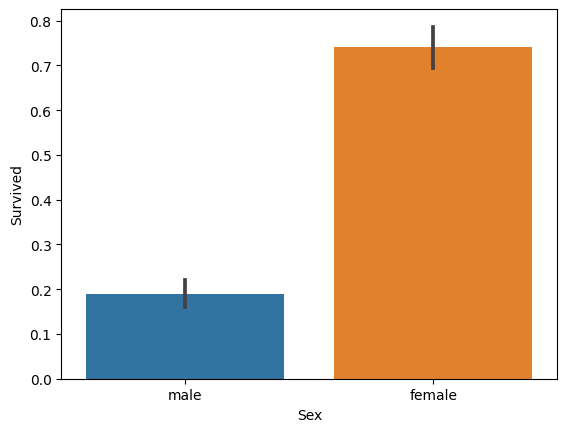

In [132]:
#Comparing the Sex feature against Survived
sns.barplot(x='Sex',y='Survived',data=train_df)
train_df.groupby('Sex',as_index=False).Survived.mean()

As one would assume the number of female who survived was much more than the males who survived i.e. 74%  females as against to 18% males

How did the Class of each passenger affect their survival?

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


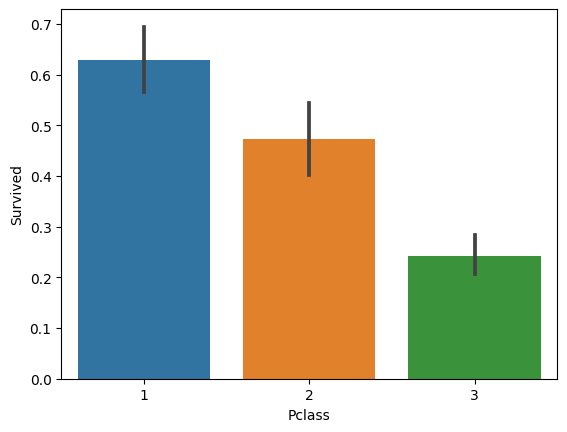

In [133]:
#Comparing the Pclass feature against Survived
sns.barplot(x='Pclass',y='Survived',data=train_df)
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Clearly Class had an effect on survival of each passenger with the percentages of survival being 62.96%, 47.28%, 24.23% for Pclass 1, 2 and 3 respectively.
Thus, belonging to Pclass = 1 had a huge advantage. 

Did the port from which the passengers embarked have an effect on their Survival?

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


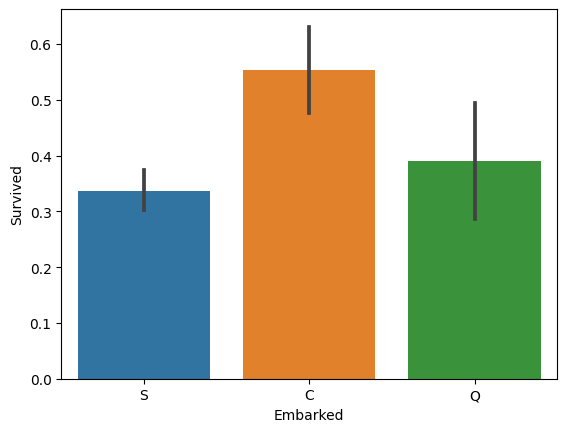

In [134]:
#Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=train_df)
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


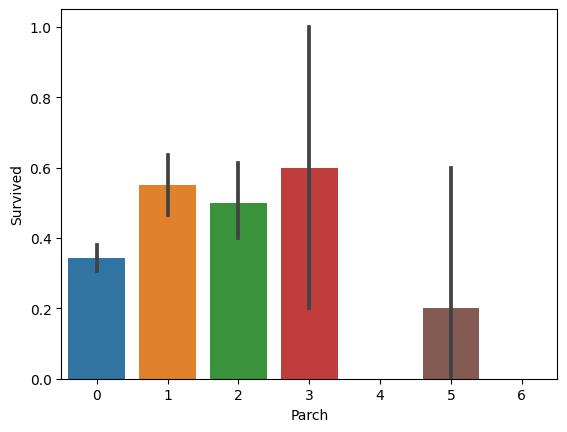

In [135]:
sns.barplot(x='Parch',y='Survived',data=train_df)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

The Age column has some missing values. We will take care of that later when we clean our training data.
First we shall proceed by:
1.  Plotting a histogram of the age values .
2. Taking a look at the median value of age as well as the spread.

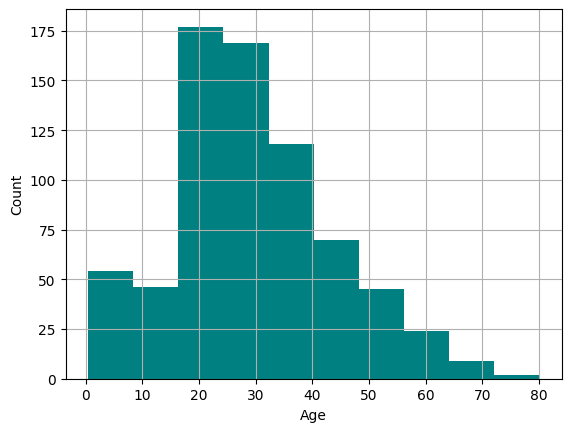

The Median age of passengers is : 28.0
The Standard Deviation age of passengers is : 14


In [136]:
train_df['Age'].hist(bins=10,color='teal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Median age of passengers is :", (train_df.Age.median()))
print("The Standard Deviation age of passengers is :", int(train_df.Age.std()))

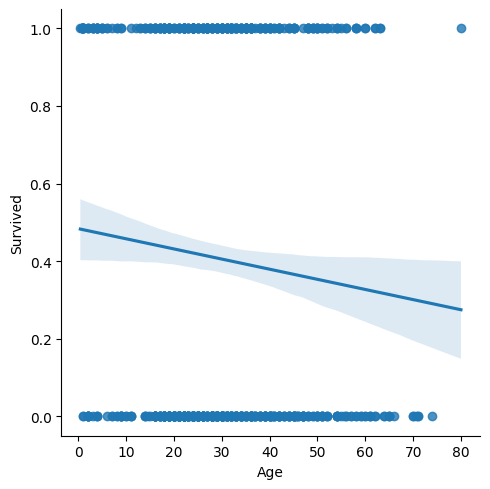

In [137]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1')

Our assumption was right, younger individuals were more likely to survive.

From the sex column we saw that there was a significant difference in the percentage of men and women that survived.
Does sex also play a role when it comes to surviving the disaster along with the age?

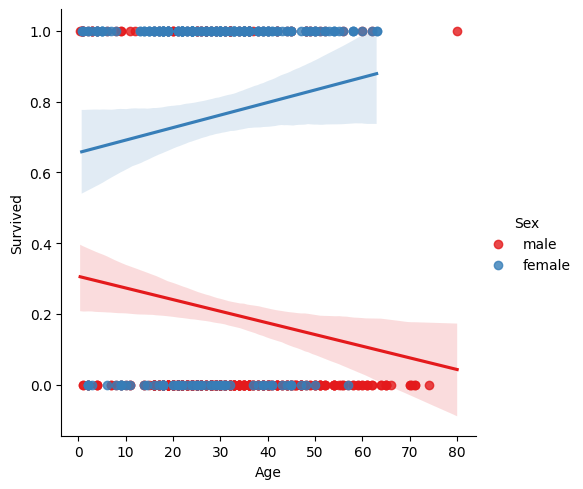

In [138]:
sns.lmplot(x='Age',y='Survived',data=train_df,hue='Sex',palette='Set1')

Interestingly, age has an opposite effect on the survival in men and women. The chances of survival increase as the age of women increases.

Takeaway: Age feature can have a different  effect on the outcome depending on the sex of the passenger. Perhaps we can use this information in feature engineering

,Sex,Age
0,female,27.0
1,male,29.0


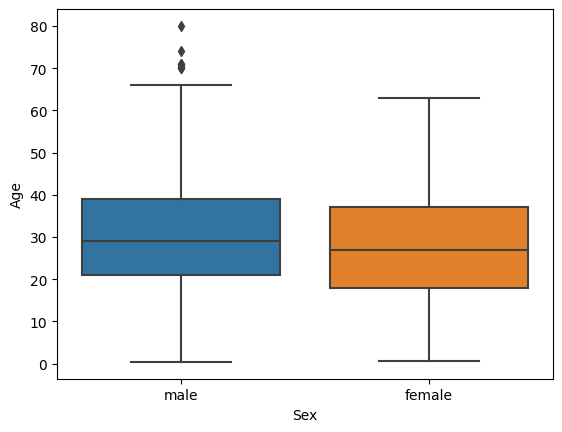

In [139]:
#Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=train_df)

#getting the median age according to Sex
train_df.groupby('Sex',as_index=False)['Age'].median()

Mean value of Fare is : 32.204207968574636
Median value of Fare is : 14.4542


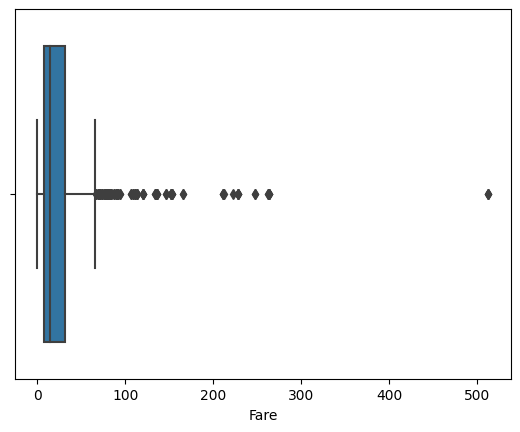

In [140]:
#plotting the Fare column to see the spread of data
sns.boxplot(x='Fare',data=train_df)

#Checking the mean and median values
print("Mean value of Fare is :",train_df.Fare.mean())
print("Median value of Fare is :",train_df.Fare.median())

** 5)Cleaning Data ***

Now that we have visualized our data , we can proceed to fill in the NaN values in our test and train datasets and drop the columns that we will not require

Now, let's fill in the missing values for Embarked column in the training dataset. Most people embarked on their journey from Southhampton port. Hence, we will be filling the  two missing values with "S"

In [141]:
drop_list=['Cabin','Ticket','PassengerId']

train_df = train_df.drop(drop_list,axis=1)
test_passenger_df = pd.DataFrame(test_df.PassengerId)
test_df = test_df.drop(drop_list,axis=1)

test_passenger_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [142]:
#filling the missing Embarked values in train and test datasets
train_df.Embarked.fillna('S',inplace=True)

We will replace the NaN values in the age column with the median age

In [143]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [144]:
#filling the missing values in the Age column
train_df.Age.fillna(train_df.Age.mean(), inplace=True)
# test_df.Age.fillna(28, inplace=True)
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


There is a small fraction of fare values missing in the fare column which we will fill using the median value since there a plenty of outliers in the data.

In [145]:
#Filling the null Fare values in test dataset
test_df.Fare.fillna(test_df.Fare.median(), inplace=True)

**6) Feature Engineering**

In [146]:
#combining train and test dataframes to work with them simultaneously
Combined_data = [train_df, test_df]

<Axes: xlabel='count', ylabel='Title'>

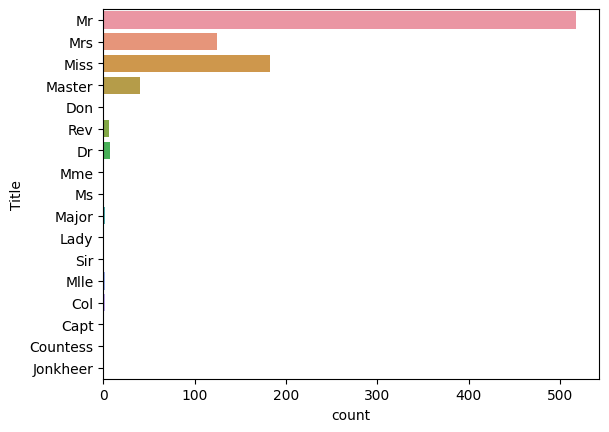

In [147]:
#extracting the various title in Names column
for dataset in Combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#Plotting the various titles extracted from the names    
sns.countplot(y='Title',data=train_df)  

In [ ]:
#Refining the title feature by merging some titles
for dataset in Combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
train_df.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


<Axes: xlabel='count', ylabel='Title'>

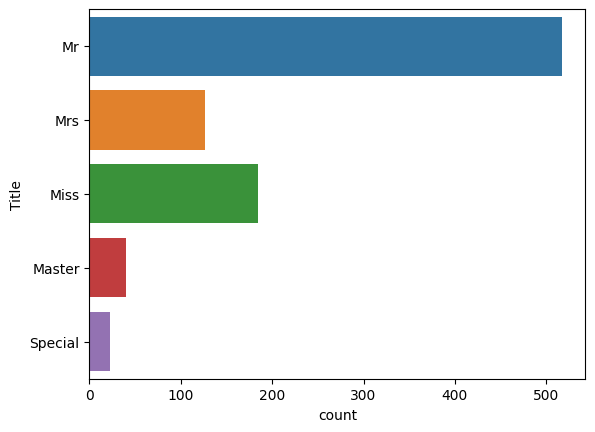

In [149]:
#Now lets see the distribution of the title feature
sns.countplot(y='Title',data=train_df)

In [150]:
#Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Combined_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

In [151]:
#Creating a new feature IsAlone from the SibSp and Parch columns
for dataset in Combined_data:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
train_df.head()    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


Getting rid of the columns that are not required anymore:

In [152]:
#dropping the Name,SibSP and Parch columns
for dataset in Combined_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)  

In [153]:
#Creating another feature if the passenger is a child
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

In [154]:
train_df['Old_Female'] = (train_df['Age']>50)&(train_df['Sex']=='female')
train_df['Old_Female'] = train_df['Old_Female'].astype(int)

test_df['Old_Female'] = (test_df['Age']>50)&(test_df['Sex']=='female')
test_df['Old_Female'] = test_df['Old_Female'].astype(int)

In [155]:
#Converting categorical variables into numerical ones
train_df2 = pd.get_dummies(train_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_df2 = pd.get_dummies(test_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
train_df2.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,0,False,True,True,False,True
1,1,38.0,71.2833,3,0,0,0,False,False,False,False,False
2,1,26.0,7.9250,2,1,0,0,False,True,False,False,True
3,1,35.0,53.1000,3,0,0,0,False,False,False,False,True
4,0,35.0,8.0500,1,1,0,0,False,True,True,False,True


In [156]:
#creating Age bands
train_df2['AgeBands'] = pd.qcut(train_df2.Age,4,labels=False) 
test_df2['AgeBands'] = pd.qcut(test_df2.Age,4,labels=False) 

In [157]:
#creating Fare bands
train_df2['FareBand'] = pd.qcut(train_df2.Fare,7,labels=False)
test_df2['FareBand'] = pd.qcut(test_df2.Fare,7,labels=False)

In [158]:
#Dropping the Age and Fare columns
train_df2.drop(['Age','Fare'],axis=1,inplace=True)
test_df2.drop(['Age','Fare'],axis=1,inplace=True)

Let's take a final look at our training and testing data before we proceed to build our model.

In [159]:
train_df2.head()
#sns.barplot('AgeBands','Survived',data=train_df2)

,Survived,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,0,1,0,0,0,False,True,True,False,True,0,0
1,1,3,0,0,0,False,False,False,False,False,3,6
2,1,2,1,0,0,False,True,False,False,True,1,1
3,1,3,0,0,0,False,False,False,False,True,2,5
4,0,1,1,0,0,False,True,True,False,True,2,1


In [160]:
test_df2.head()

,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,1,1,0,0,False,True,True,True,False,2.0,1
1,3,0,0,0,False,True,False,False,True,3.0,0
2,1,1,0,0,True,False,True,True,False,3.0,2
3,1,1,0,0,False,True,True,False,True,1.0,2
4,3,0,0,0,False,True,False,False,True,1.0,2


In [161]:
#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [162]:
#Splitting out training data into X: features and y: target
X = train_df2.drop("Survived",axis=1) 
y = train_df2["Survived"]

#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [163]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_logreg

80.6

In [164]:
#let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,y,cv=5)
 
np.mean(cv_scores)*100

80.35904839620865

In [165]:
#Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 4}
Best score: 82.4907413219509


In [166]:
#Random Forest CLassifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 9}
Best score: 80.02134203753688


In [167]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)


Best value of parameters: {'max_depth': 4, 'n_estimators': 17}
Best score: 82.15491808423828


ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

I hope this notebook helped you out and please free to give any feedback or advice in the comments. I am new and this would help me out a lot!

**Sources:**
*  [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Titanic Survival Predictions (Beginner)](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner/notebook)
* [Machine Learning with Kaggle: Feature Engineering](https://www.datacamp.com/community/tutorials/feature-engineering-kaggle)